# Regression - Real Estate in Rishon Lezion

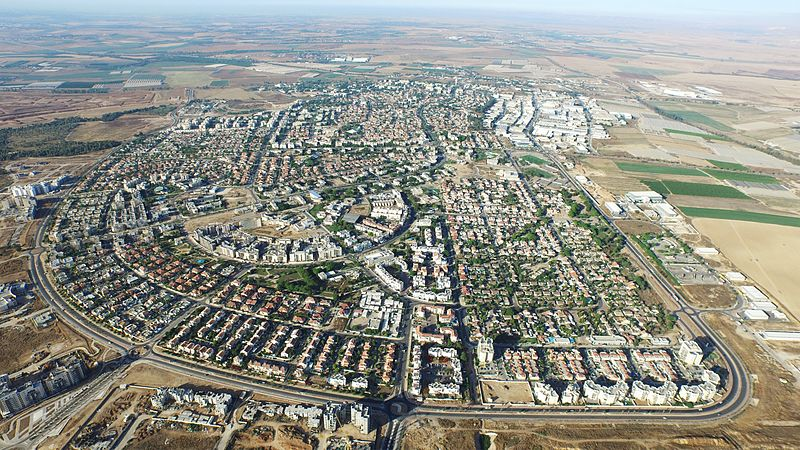

## Main Goal

Predict the price of an apartment (while having the other data).

In [1]:
# Importing the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

The csv file that we created from web scraping

In [2]:
df = pd.read_csv('C:/Users/matan/Data Science Project/Rishon_Lezion_Nadlan.csv')

In [3]:
df.head()

,index,Year sold,Month sold,Day sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",דירה בבית קומות,3.0,3.0,80.98,1640000


In [4]:
df

,index,Year sold,Month sold,Day sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",דירה בבית קומות,3.0,3.0,80.98,1640000
...,...,...,...,...,...,...,...,...,...,...
25832,25832,2004,11,8,תורה ועבודה,דירה בבית קומות,3.0,4.0,39.00,340000
25833,25833,2004,11,8,הרב נורוק,דירה בבית קומות,3.0,2.0,44.00,363000
25834,25834,2004,11,8,סוקולוב,דירה בבית קומות,3.0,1.0,68.51,735000
25835,25835,2004,11,8,שרירא שמואל,דירה בבית קומות,4.0,3.0,108.00,752000


In [5]:
df.isnull().sum()
# We have no null values,
# That's because we already fixed it the 'Web Scraping' notebook.

index              0
Year sold          0
Month sold         0
Day sold           0
Street             0
Kind               0
Number of rooms    0
Floor              0
Squared meter      0
Price              0
dtype: int64

## Changing from text to numerical

Replace text to integers in column 'Kind' by levels

In [6]:
df["Kind"].replace({"דירה": "1", "דירה בבית קומות": "1"}, inplace=True)
df["Kind"].replace({"דירת גן": "2"}, inplace=True)
df["Kind"].replace({"דירת גג": "3", "דירת גג (פנטהאוז)": "3"}, inplace=True)

Removing the unnecesary columns

In [7]:
df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
25832    25832
25833    25833
25834    25834
25835    25835
25836    25836
Name: index, Length: 25837, dtype: int64

In [8]:
df.head()

,Year sold,Month sold,Day sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,12,20,נירים,1,6.0,6.0,134.60,3670000
1,2021,12,19,קרל נטר,1,3.0,3.0,81.00,1770000
2,2021,12,16,יהודה הלוי,1,5.0,5.0,120.00,2400000
3,2021,12,15,שרירא שמואל,1,4.0,2.0,64.32,2050000
4,2021,12,15,"תרמ""ב",1,3.0,3.0,80.98,1640000


Description for the columns stats

In [9]:
df.describe()

,Year sold,Month sold,Day sold,Number of rooms,Floor,Squared meter,Price
count,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,2.583700e+04
mean,2013.780896,6.507528,15.902582,3.730332,3.930487,86.165063,1.423444e+06
std,4.599305,3.481454,8.830752,0.854577,3.368807,31.706418,1.739804e+06
min,2004.000000,1.000000,1.000000,1.000000,0.000000,21.500000,5.000000e+04
25%,2010.000000,3.000000,8.000000,3.000000,2.000000,66.300000,1.000000e+06
50%,2014.000000,6.000000,16.000000,4.000000,3.000000,83.220000,1.350000e+06
75%,2018.000000,10.000000,24.000000,4.000000,5.000000,100.470000,1.700000e+06
max,2021.000000,12.000000,31.000000,9.000000,26.000000,1950.000000,2.000000e+08


## Basic ploting

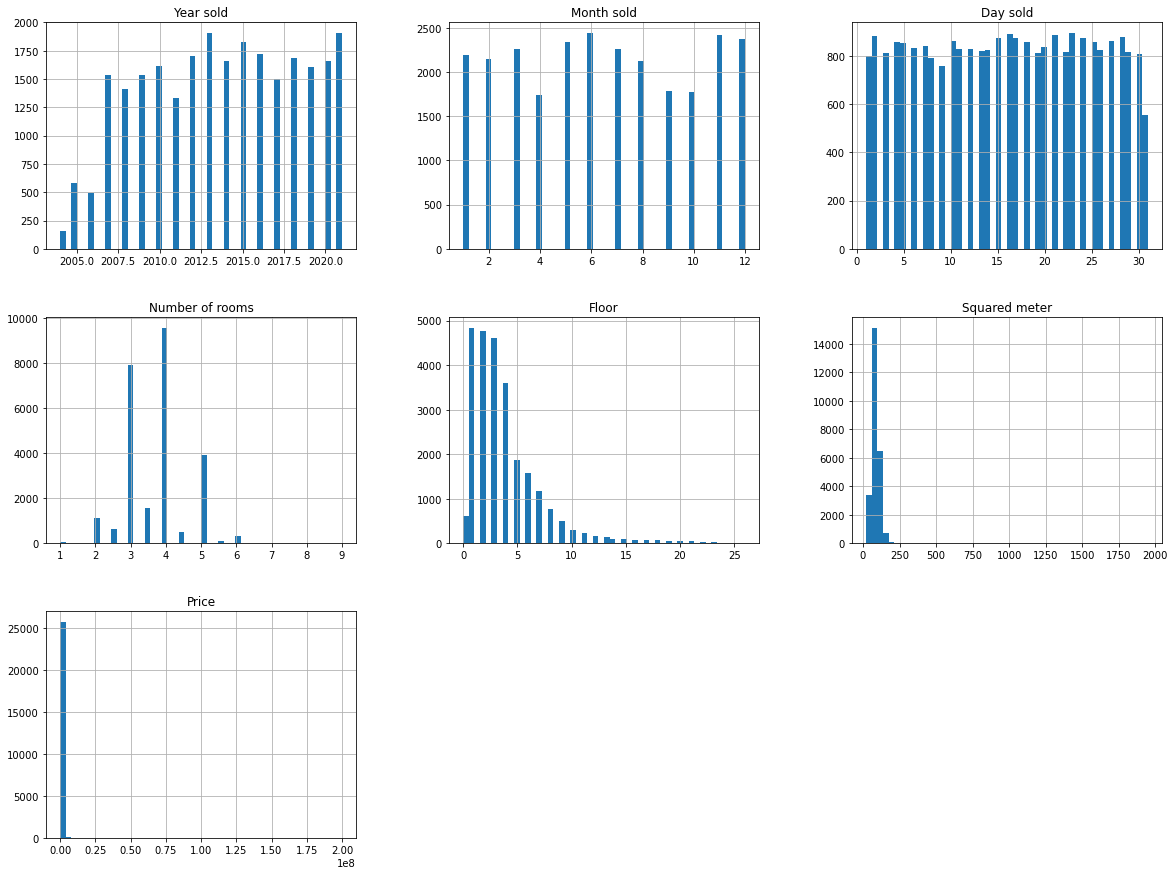

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Cleaning outliers

In [11]:
df = df.loc[df['Year sold'] >= 2005]
df = df.loc[df['Floor'] < 10]
df = df.loc[(df['Number of rooms'] >= 2) & (df['Number of rooms'] <= 5)]
df = df.loc[df['Squared meter'] < 250]
df = df.loc[df['Price'] < 10000000]

Ploting again to check if there are more specific outliers

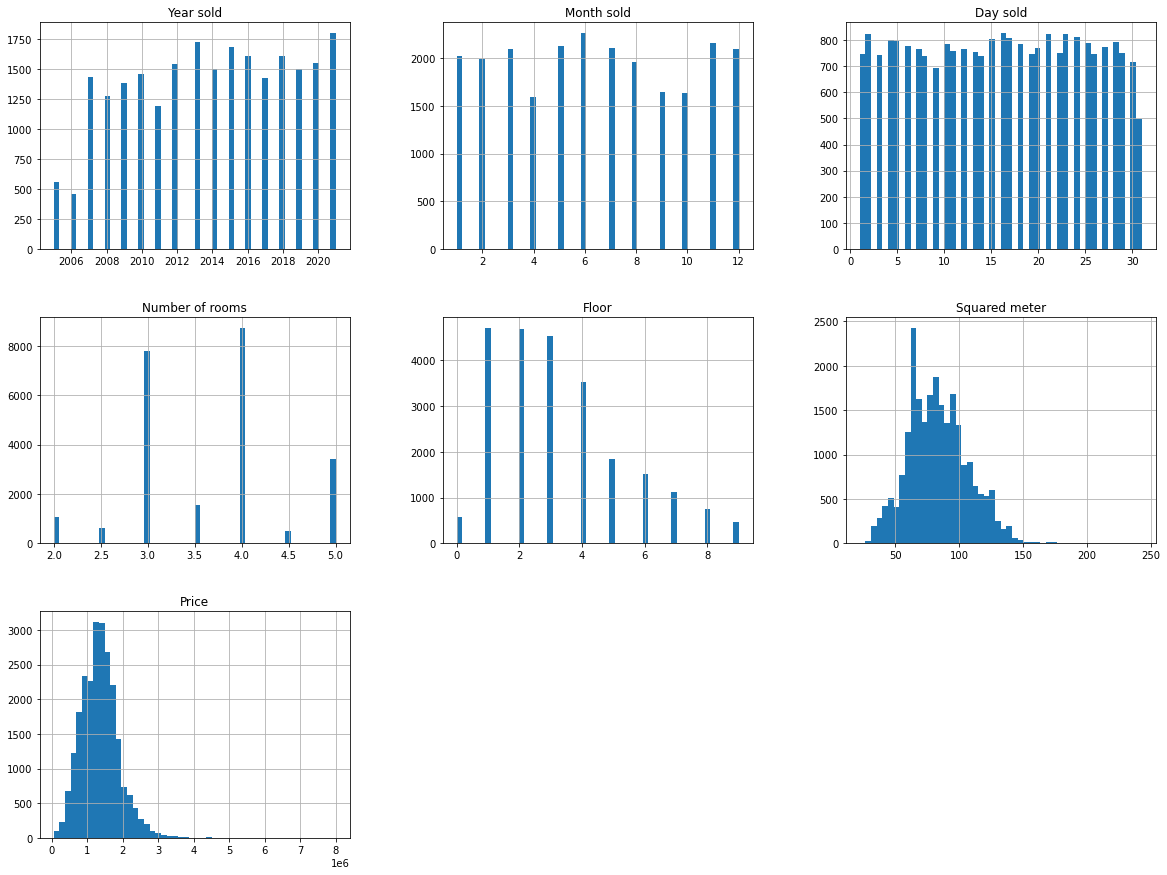

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Cleaning outliers again (more specific)

In [13]:
df = df.loc[(df['Squared meter'] <= 150) & (df['Squared meter'] >= 25)] 
df = df.loc[df['Price'] < 3000000]

## Correlation matrix

From here we can see which columns are more correlated to the 'Price' column, and which columns aren't.

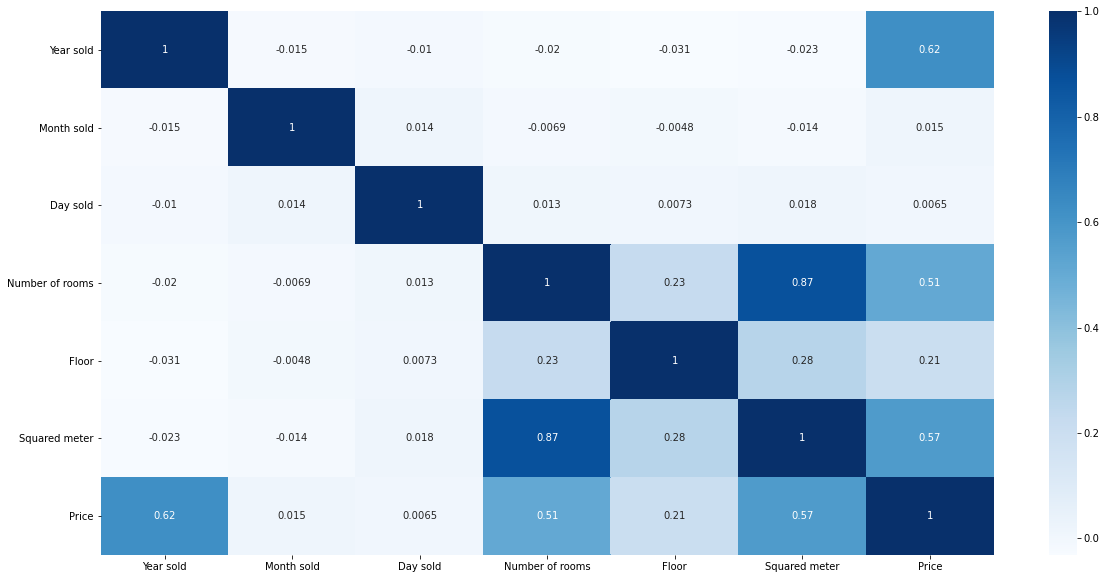

In [14]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

from the heatmp we can see that the 'Month sold' and 'Day sold' columns are not correlated to the 'Price' column.

In [15]:
# deleting those columns
df.pop('Month sold')
df.pop('Day sold')

1        19
2        16
3        15
4        15
5        14
         ..
25675     4
25676     4
25677     3
25678     3
25679     3
Name: Day sold, Length: 23475, dtype: int64

In [16]:
df.describe()

,Year sold,Number of rooms,Floor,Squared meter,Price
count,23475.000000,23475.000000,23475.000000,23475.000000,2.347500e+04
mean,2013.867306,3.651097,3.275612,82.883137,1.332598e+06
std,4.568058,0.782807,2.082915,22.740425,4.960156e+05
min,2005.000000,2.000000,0.000000,26.100000,5.000000e+04
25%,2010.000000,3.000000,2.000000,65.400000,9.750000e+05
50%,2014.000000,4.000000,3.000000,81.370000,1.322000e+06
75%,2018.000000,4.000000,4.000000,97.980000,1.645000e+06
max,2021.000000,5.000000,9.000000,150.000000,2.999000e+06


Note: we checked several options,

The best of them was the one with 'get_dummies' function on the 'Street' column.

In [17]:
df_with_street_dummies = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

In [18]:
df_with_street_dummies.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
1,2021,1,3.0,3.0,81.00,1770000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1,5.0,5.0,120.00,2400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,1,4.0,2.0,64.32,2050000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021,1,3.0,3.0,80.98,1640000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2021,1,4.0,2.0,86.44,1710000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Spliting the data into train and test parts

In [19]:
prices = df_with_street_dummies['Price']
data_without_prices = df_with_street_dummies.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_without_prices, prices, test_size=0.2, random_state = 7)

In [20]:
X_train

,Year sold,Kind,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
11617,2015,1,2.5,1.0,54.81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19611,2010,1,4.0,2.0,78.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9964,2016,1,3.0,1.0,45.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,2019,1,4.0,2.0,86.80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25086,2006,1,4.0,3.0,109.36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2021,1,5.0,5.0,121.11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22686,2008,1,2.5,1.0,56.96,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6154,2018,1,3.0,2.0,61.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11613,2015,1,4.0,7.0,84.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train.describe()

,Year sold,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,אברמוביץ,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
count,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,...,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000
mean,2013.899042,3.647923,3.275666,82.846781,0.000745,0.002290,0.001917,0.001384,0.009744,0.002236,...,0.001384,0.010969,0.001704,0.001278,0.004100,0.005591,0.009691,0.000373,0.005485,0.000799
std,4.579388,0.781924,2.079032,22.729775,0.027294,0.047797,0.043742,0.037183,0.098234,0.047239,...,0.037183,0.104160,0.041245,0.035727,0.063902,0.074566,0.097968,0.019303,0.073856,0.028251
min,2005.000000,2.000000,0.000000,26.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,3.000000,2.000000,65.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000,3.000000,81.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,4.000000,4.000000,97.985000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,5.000000,9.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see from above, the std for the columns: 

'Number of rooms' and 'Floor' is low - means that almost all of the data is of those columns are near the column average (make sense). 

'Year sold' is little bit higher - means that most of the data in this column are near the column average (make sense because we have more options in 'Year sold').

'Squared meter' is much more higher - means that a lot of the is not close to the column average (again, make sense because we have a tons of options for 'Squared meter').

### Train plot 

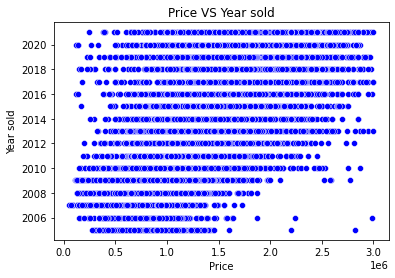

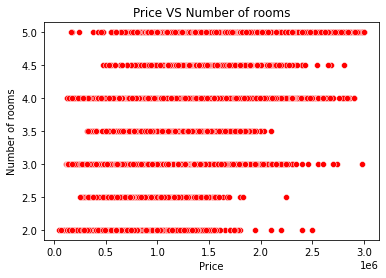

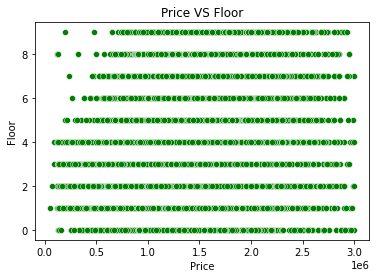

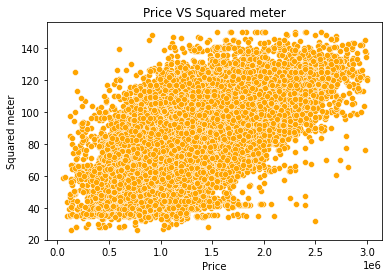

In [22]:
sb.scatterplot(x = y_train, y = X_train['Year sold'], color='blue')
plt.title("Price VS Year sold")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Number of rooms'], color='red')
plt.title("Price VS Number of rooms")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Floor'], color='green')
plt.title("Price VS Floor")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Squared meter'], color='orange')
plt.title("Price VS Squared meter")
plt.show()

## Regression lines

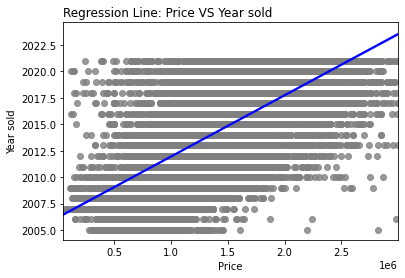

In [23]:
ax = sb.regplot(x=y_train, y=X_train["Year sold"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Year sold", color="black", loc='left');

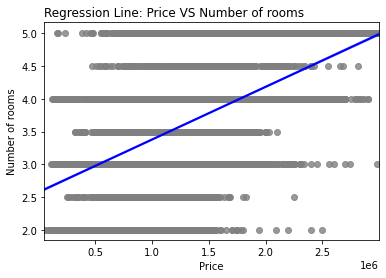

In [24]:
ax = sb.regplot(x=y_train, y=X_train["Number of rooms"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Number of rooms", color="black", loc='left');

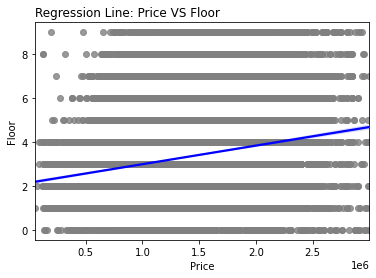

In [25]:
ax = sb.regplot(x=y_train, y=X_train["Floor"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Floor", color="black", loc='left');

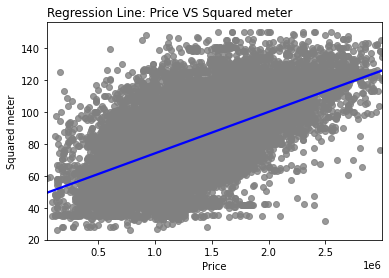

In [26]:
ax = sb.regplot(x=y_train, y=X_train["Squared meter"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Squared meter", color="black", loc='left');

As we can see from the above, the 'Floor' has the minimum impact on the 'Price'.

while the others has much more impact on the apartment price.

### Normalization 

In [27]:
num_features = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
basic_scale = MinMaxScaler()
X_train[num_features] = basic_scale.fit_transform(X_train[num_features])
X_test[num_features] = basic_scale.transform(X_test[num_features])

### Models

#### Dummy Regressor

##### 1) Median approach

In [43]:
dummy_reg_by_median = DummyRegressor(strategy="median")
dummy_reg_by_median.fit(X_train, y_train)
pred = dummy_reg_by_median.predict(X_test)
dummy_median_err = mean_squared_error(y_test, pred)

print("score: ",dummy_reg_by_median.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",dummy_median_err)

score:  -1.6028371471188407e-05
r^2 score:  -1.6028371471188407e-05
MAE:  392710.17870074545
RMSE:  246438848321.37698


##### 2) Mean approach

In [44]:
dummy_reg_by_mean = DummyRegressor(strategy="mean")
dummy_reg_by_mean.fit(X_train, y_train)
pred = dummy_reg_by_mean.predict(X_test)
dummy_mean_err = mean_squared_error(y_test, pred)

print("score: ",dummy_reg_by_mean.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))  
print ("RMSE: ",dummy_mean_err)

score:  -0.0005825168827535698
r^2 score:  -0.0005825168827535698
MAE:  392938.3388596393
RMSE:  246578450860.08334


#### Linear Regression

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X_test)
linear_reg_err = mean_squared_error(y_test,pred)

print("score: ",linear_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",linear_reg_err)

score:  -1.986941999890986e+22
r^2 score:  -1.986941999890986e+22
MAE:  1984473490535689.0
RMSE:  4.896518498127677e+33


In [31]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=10,scoring="r2")

print("After cross validation\n")
print("r^2 score:",linear_reg_scores_r2.mean())
print ("RMSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation

r^2 score: -3.1948384276380605e+22
RMSE: 8.873119828029754e+16


#### KNN Regressor

In [32]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
pred = knn_reg.predict(X_test)
knn_reg_err = mean_squared_error(y_test,pred)

print("score: ",knn_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",knn_reg_err)

score:  0.7700981351360849
r^2 score:  0.7700981351360849
MAE:  163601.15804046858
RMSE:  56655842703.10723


In [33]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("RMSE:",np.sqrt(-knn_reg_scores.mean()))

After cross validation

R2 Score: 0.7455010343230871
RMSE: 250065.14995490407


#### Logistic Regression

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
log_reg_err = mean_squared_error(y_test,pred)

print("score: ",log_reg.score(X_test, y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("RMSE: ",log_reg_err)

score:  0.02577209797657082
r^2 score:  0.5471598283189274
MAE:  253886.19616613418
RMSE:  111595621686.65921


In [35]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("r^2 Score:",log_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-log_reg_scores.mean()))

After cross validation

r^2 Score: 0.5380655540630854
Mean Square ERR: 336986.9185642643


#### Random Forest

In [36]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
rf_reg_err = mean_squared_error(y_test,pred)

print("score: ",rf_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("MSE: ",rf_reg_err)

score:  0.7984475875083503
r^2 score:  0.7984475875083503
MAE:  145488.16961384597
MSE:  49669548288.8665


In [37]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

R2 Score: 0.8090012188883545
Mean Square ERR: 216570.0793535623


## HyperParameters Tuning

For improvment, we will use RandomSearchCV on our best model.

Note: we tried the GridSearchCV approach too, but it took us an 'infinite' time to run that...

In [39]:
# number of trees in random forest
n_estimators_list = [100, 500, 1000, 3000]
# number of features to consider at every split
max_features_list = np.arange(0.01,0.2,0.01)
# maximum number of levels in tree
max_depth_list = [2,8,None]
# number of samples
max_samples_list = [0.5,0.75,1.0]
params = {'n_estimators':n_estimators_list,
          'max_features':max_features_list,
          'max_depth':max_depth_list,
          'max_samples':max_samples_list}
rs_model = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=7),
                              param_distributions = params,
                              n_jobs = -1,
                              n_iter = 30,
                              cv = 10)
# fitting the training part
rs_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [100, 500, 1000, 3000]})

In [40]:
# The best parameters
best_parameters = rs_model.best_params_
print(best_parameters)

{'n_estimators': 500, 'max_samples': 0.75, 'max_features': 0.06999999999999999, 'max_depth': None}


In [41]:
# The best score
best_score = rs_model.best_score_
print("score: ",best_score)

score:  0.8364212579366356


# Conclusion

## Models score 

In [45]:
print("Dummy Regressor (by median): ",dummy_median_err," RMSE")
print("Dummy Regressor (by mean): ",dummy_mean_err," RMSE")
print("Linear Regression: ",linear_reg_err," RMSE")
print("KNN Regressor: ",knn_reg_err," RMSE")
print("Logistic Regressor: ",log_reg_err," RMSE")
print("Random Forest Regressor: ",rf_reg_err," RMSE")

Dummy Regressor (by median):  246438848321.37698  RMSE
Dummy Regressor (by mean):  246578450860.08334  RMSE
Linear Regression:  4.896518498127677e+33  RMSE
KNN Regressor:  56655842703.10723  RMSE
Logistic Regressor:  111595621686.65921  RMSE
Random Forest Regressor:  49669548288.8665  RMSE


The best model (between the models that we checked) for our dataset is: **Random Forest Reggresor**

After a RandomizedSearchCV we improved it and got the best HyperParameters.

Our final best score is: **0.83642**.